In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
import pickle

import pandas as pd
import re
from pandas.io.json import json_normalize
import json

In [2]:
content_fltr_df = pd.read_pickle('../data/content_filter_df.pkl')

In [30]:
clean_cntnt_fltr_df = content_fltr_df.drop(['genres', 'genre_ids', 'release_date', 'revenue', 'runtime'], axis=1)
clean_cntnt_fltr_df = clean_cntnt_fltr_df.dropna()

In [28]:
clean_cntnt_fltr_df.head()

,id,popularity,vote_average,release_year,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,862.0,21.946943,7.7,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8844.0,17.015539,6.9,1995.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15602.0,11.712900,6.5,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,31357.0,3.859495,6.1,1995.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11862.0,8.387519,5.7,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([clean_cntnt_fltr_df.loc[0,:]], [clean_cntnt_fltr_df.loc[10003,:]])

array([[2.60654898e-06]])

In [24]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


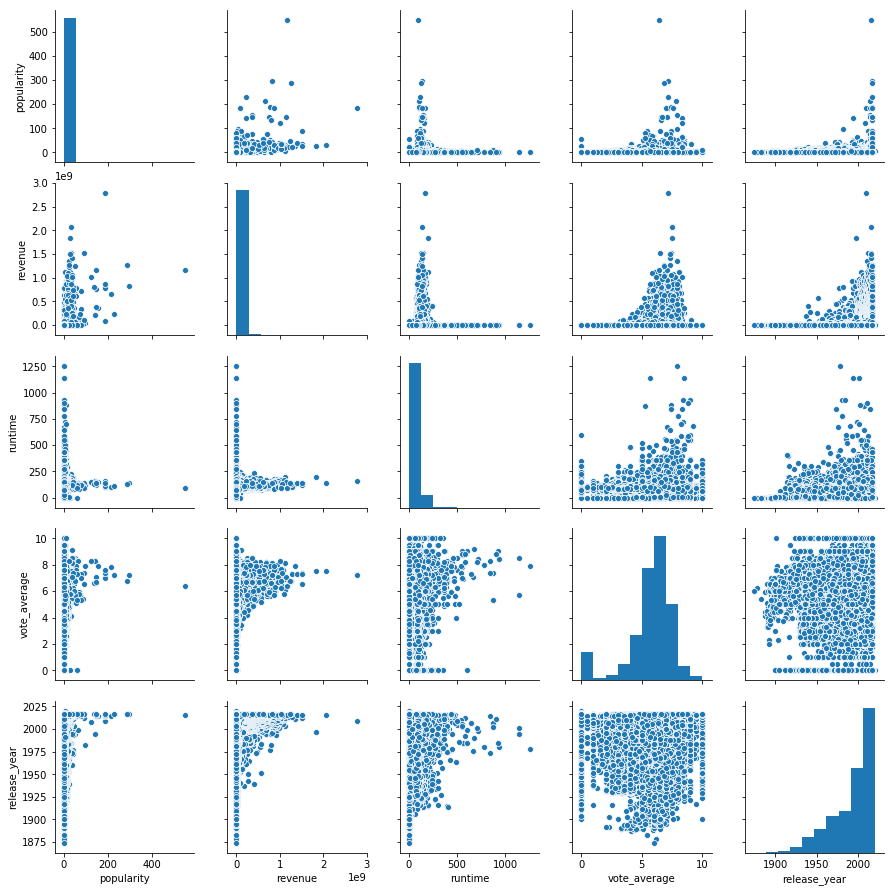

In [26]:
sns.pairplot(clean_cntnt_fltr_df[['popularity', 'revenue', 'runtime', 'vote_average', 'release_year']])

In [31]:
from sklearn.cluster import KMeans, MiniBatchKMeans
km = KMeans(n_clusters=60, init='k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(clean_cntnt_fltr_df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 169184019530.18558
start iteration
done sorting
end inner loop
Iteration 1, inertia 162224799286.82178
start iteration
done sorting
end inner loop
Iteration 2, inertia 159167067043.80984
start iteration
done sorting
end inner loop
Iteration 3, inertia 157506703356.81244
start iteration
done sorting
end inner loop
Iteration 4, inertia 156374416172.5852
start iteration
done sorting
end inner loop
Iteration 5, inertia 155679282318.66183
start iteration
done sorting
end inner loop
Iteration 6, inertia 154824967932.51715
start iteration
done sorting
end inner loop
Iteration 7, inertia 153935867608.64664
start iteration
done sorting
end inner loop
Iteration 8, inertia 153319385131.43082
start iteration
done sorting
end inner loop
Iteration 9, inertia 152917463571.54105
start iteration
done sorting
end inner loop
Iteration 10, inertia 152673820095.1243
start iteration
done sorting
end inner loop
Iteration

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=60, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [43]:
clustered = zip(km.labels_, clean_cntnt_fltr_df['id'])

In [44]:
from collections import defaultdict

movie_summaries_clustered = defaultdict(list)

for cluster, movie_id in clustered:
    movie_summaries_clustered[cluster].append(movie_id)


In [34]:
def get_cluster_number(movie, cluster_zip):
    for cluster, movie_id in cluster_zip:

        if movie_id == movie:
            return cluster

    raise Exception('Movie not found in cluster')

In [42]:
def get_all_movies_in_cluster(cluster_number, cluster_dict):
    movies = cluster_dict[cluster_number]
    return [get_movie_name(mov) for mov in movies]


In [41]:
def get_movie_name(movie_id):
    return movies_metadata_df[movies_metadata_df.id == movie_id]['original_title'].iloc[0]


In [40]:
def convert_ids(ids_in_csv):
    return pd.to_numeric(ids_in_csv, errors='coerce').astype('int64')

movies_metadata_df = pd.read_csv('../data/the-movies-dataset/movies_metadata.csv'
                        , converters={'id': lambda x: convert_ids(x), 'imdb_id': lambda x: convert_ids(x)}
                       ,usecols=['id', 'original_title'
                                 , 'genres', 'homepage'
                                 ,'overview', 'popularity', 'poster_path'
                                 , 'release_date', 'revenue', 'runtime'
                                 ,'spoken_languages','tagline', 'title'
                                 ,'vote_average', 'vote_count'])

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
clean_cntnt_fltr_df.head()

,id,popularity,vote_average,release_year,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,862.0,21.946943,7.7,1995.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8844.0,17.015539,6.9,1995.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,15602.0,11.712900,6.5,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,31357.0,3.859495,6.1,1995.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11862.0,8.387519,5.7,1995.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
movies_metadata_df[['title','id']].merge(clean_cntnt_fltr_df, left_on='id', right_on='id').head(35)

,title,id,popularity,vote_average,release_year,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,Toy Story,862,21.946943,7.7,1995.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Jumanji,8844,17.015539,6.9,1995.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Grumpier Old Men,15602,11.712900,6.5,1995.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Waiting to Exhale,31357,3.859495,6.1,1995.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Father of the Bride Part II,11862,8.387519,5.7,1995.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Heat,949,17.924927,7.7,1995.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sabrina,11860,6.677277,6.2,1995.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,Tom and Huck,45325,2.561161,5.4,1995.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Sudden Death,9091,5.231580,5.5,1995.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,GoldenEye,710,14.686036,6.6,1995.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
movie_summaries_clustered.keys()

dict_keys([18, 11, 26, 30, 21, 0, 44, 14, 8, 10, 33, 5, 56, 49, 19, 40, 36, 28, 25, 53, 43, 17, 48, 57, 47, 51, 15, 37, 50, 20, 23, 1, 27, 58, 16, 42, 45, 2, 55, 6, 32, 54, 34, 31, 4, 59, 9, 46, 7, 52, 13, 38, 35, 41, 24, 3, 39, 12, 22, 29])

In [56]:
get_all_movies_in_cluster(25, movie_summaries_clustered)

['The Journey of August King',
 'Reckless',
 'Dream Man',
 'Double Happiness',
 'Blue Sky',
 'The Inkwell',
 "The Wooden Man's Bride",
 'Girl 6',
 'Killer: A Journal of Murder',
 'The Trigger Effect',
 'The Last Time I Saw Paris',
 'Grace of My Heart',
 'I bambini ci guardano',
 "I'm Not Rappaport",
 "Some Mother's Son",
 'Hotel de Love',
 'Touch',
 'Salut cousin !',
 'Sprung',
 'The War at Home',
 'Critical Care',
 'Woo',
 'Passion in the Desert',
 'This World, Then the Fireworks',
 'Modulations',
 'Guinevere',
 'Alvarez Kelly',
 'Rain',
 'Come See the Paradise',
 'Beautiful People',
 'And God Created Woman',
 'Charlie, the Lonesome Cougar',
 'Slaves to the Underground',
 'Shanghai Surprise',
 'Nadine',
 'Smoking / No Smoking',
 'American Virgin',
 'H.O.T.S.',
 'Giulia e Giulia',
 'Down from the Mountain',
 'Les Rivières pourpres',
 'Haunted Castle',
 'Bad Dreams',
 'Rocket Gibraltar',
 'Immediate Family',
 'Scenes from the Class Struggle in Beverly Hills',
 'Orphans',
 'Into the Arms

In [65]:
movies_metadata_df[movies_metadata_df.title == 'Wayne\'s World']

,genres,homepage,id,original_title,overview,popularity,poster_path,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
3135,"[{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...",NaN,8872,Wayne's World,When a sleazy TV exec offers Wayne and Garth a...,10.1808,/ttv6BA0DOes1zXMnQSNXTGeGkdJ.jpg,1992-02-14,121697323.0,94.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",You'll laugh. You'll cry. You'll hurl.,Wayne's World,6.5,738.0
